# 312010191-Gunawan
## Pengolahan Citra¶
### Pertemuan 11
### Latihan :
#### 2. Colormap Normalization

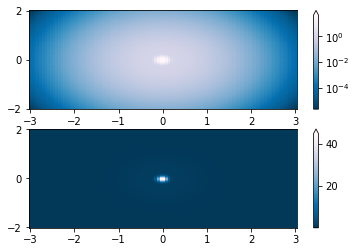

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# Logarithmic
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=ax[1], extend='max')
plt.show()

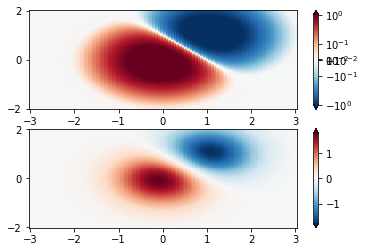

In [11]:
# Symmetric logarithmic

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0, base=10),
                       cmap='RdBu_r', shading='auto')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-np.max(Z), shading='auto')
fig.colorbar(pcm, ax=ax[1], extend='both')
plt.show()

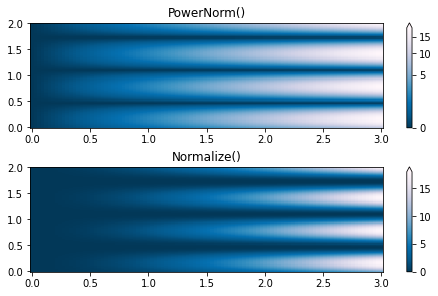

In [12]:
N = 100
X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1 + np.sin(Y * 10.)) * X**2

fig, ax = plt.subplots(2, 1, constrained_layout=True)

pcm = ax[0].pcolormesh(X, Y, Z1, norm=colors.PowerNorm(gamma=0.5),
                       cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=ax[0], extend='max')
ax[0].set_title('PowerNorm()')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=ax[1], extend='max')
ax[1].set_title('Normalize()')
plt.show()

In [13]:
import matplotlib.colors as colors

bounds = np.array([-0.25, -0.125, 0, 0.5, 1])

norm = colors.BoundaryNorm(boundaries=bounds, ncolors=4)

print(norm([-0.2, -0.15, -0.02, 0.3, 0.8, 0.99]))

[0 0 1 2 3 3]


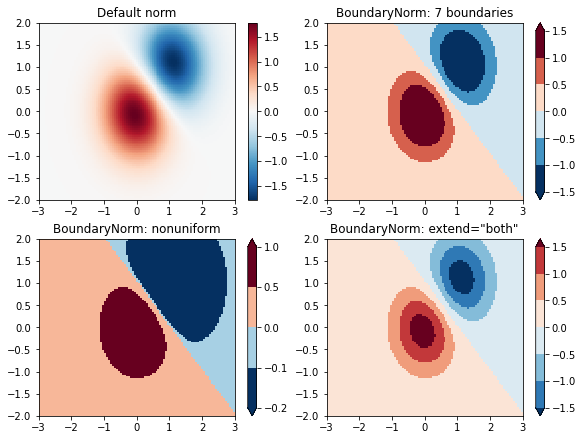

In [14]:
# Discrete bounds

N = 100
X, Y = np.meshgrid(np.linspace(-3, 3, N), np.linspace(-2, 2, N))
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = ((Z1 - Z2) * 2)[:-1, :-1]

fig, ax = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)
ax = ax.flatten()

# Default norm:
pcm = ax[0].pcolormesh(X, Y, Z, cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], orientation='vertical')
ax[0].set_title('Default norm')

# Even bounds give a contour-like effect:
bounds = np.linspace(-1.5, 1.5, 7)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[1].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[1], extend='both', orientation='vertical')
ax[1].set_title('BoundaryNorm: 7 boundaries')

# Bounds may be unevenly spaced:
bounds = np.array([-0.2, -0.1, 0, 0.5, 1])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[2].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[2], extend='both', orientation='vertical')
ax[2].set_title('BoundaryNorm: nonuniform')

# With out-of-bounds colors:
bounds = np.linspace(-1.5, 1.5, 7)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
pcm = ax[3].pcolormesh(X, Y, Z, norm=norm, cmap='RdBu_r')
# The colorbar inherits the "extend" argument from BoundaryNorm.
fig.colorbar(pcm, ax=ax[3], orientation='vertical')
ax[3].set_title('BoundaryNorm: extend="both"')
plt.show()